## Overfitting Scenario

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error,accuracy_score
import matplotlib.pyplot as plt

In [38]:
# Load dataset California Housing
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [4]:
# Inisialisasi model Decision Tree Regressor
model = DecisionTreeRegressor(max_depth=50, random_state=42)

# Melatih model dengan data latih
model.fit(X_train, y_train)

# Membuat prediksi untuk data latih dan data uji
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [5]:
# Menghitung Mean Squared Error (MSE) untuk data latih dan data uji
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Menampilkan hasil MSE
print(f'Training MSE: {train_mse}')
print(f'Test MSE: {test_mse}')

Training MSE: 9.790037243329224e-32
Test MSE: 0.5243637747330264


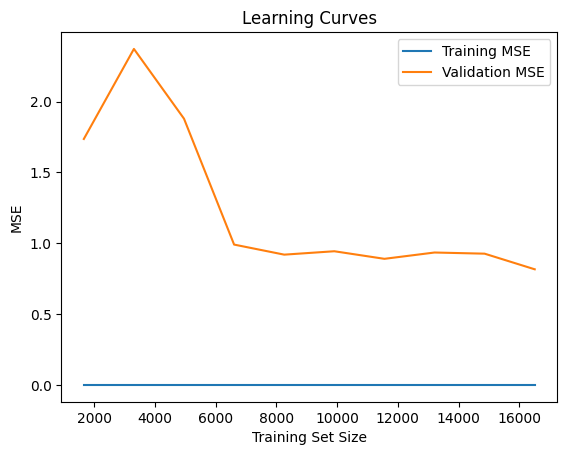

In [6]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    model, X_scaled, y, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10)
)
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training MSE')
plt.plot(train_sizes, test_scores_mean, label='Validation MSE')
plt.xlabel('Training Set Size')
plt.ylabel('MSE')
plt.title('Learning Curves')
plt.legend()
plt.show()

In [7]:
from sklearn.model_selection import cross_val_score

# Menggunakan cross-validation dengan 5 fold
cross_val_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Menampilkan hasil cross-validation
print(f'Cross-Validation MSE: {-cross_val_scores.mean()}')

Cross-Validation MSE: 0.5550010846484291


In [8]:
# Membuat model Decision Tree dengan kedalaman yang lebih kecil
model_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
model_reg.fit(X_train, y_train)

# Evaluasi pada data latih dan uji
y_train_pred_reg = model_reg.predict(X_train)
y_test_pred_reg = model_reg.predict(X_test)

# Hitung MSE
train_mse_reg = mean_squared_error(y_train, y_train_pred_reg)
test_mse_reg = mean_squared_error(y_test, y_test_pred_reg)

print(f'Training MSE (After Regularization): {train_mse_reg}')
print(f'Test MSE (After Regularization): {test_mse_reg}')

Training MSE (After Regularization): 0.4928096322147045
Test MSE (After Regularization): 0.5210801561811793


In [9]:
# Menggunakan ccp_alpha untuk pruning (Cost Complexity Pruning)
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Melatih model dengan pruning
model_pruned = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alphas[-2])
model_pruned.fit(X_train, y_train)

# Membuat prediksi
y_train_pred_pruned = model_pruned.predict(X_train)
y_test_pred_pruned = model_pruned.predict(X_test)

# Menghitung MSE
train_mse_pruned = mean_squared_error(y_train, y_train_pred_pruned)
test_mse_pruned = mean_squared_error(y_test, y_test_pred_pruned)

print(f'Pruned Model Training MSE: {train_mse_pruned}')
print(f'Pruned Model Test MSE: {test_mse_pruned}')

Pruned Model Training MSE: 0.9189620181001872
Pruned Model Test MSE: 0.9194598144703808


In [10]:
# Menambahkan sedikit noise ke data sebagai augmentasi
X_train_aug = X_train + np.random.normal(0, 0.1, X_train.shape)

# Melatih ulang model dengan augmented data
model_aug = DecisionTreeRegressor(max_depth=10, random_state=42)
model_aug.fit(X_train_aug, y_train)

# Membuat prediksi
y_train_pred_aug = model_aug.predict(X_train_aug)
y_test_pred_aug = model_aug.predict(X_test)

# Menghitung MSE
train_mse_aug = mean_squared_error(y_train, y_train_pred_aug)
test_mse_aug = mean_squared_error(y_test, y_test_pred_aug)

print(f'Augmented Data Training MSE: {train_mse_aug}')
print(f'Augmented Data Test MSE: {test_mse_aug}')

Augmented Data Training MSE: 0.3182064141102627
Augmented Data Test MSE: 0.5153630476556924


In [11]:
from sklearn.ensemble import RandomForestRegressor
# Inisialisasi Random Forests dengan n_estimators (jumlah pohon)
model_rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Melatih model
model_rf.fit(X_train, y_train)

# Membuat prediksi
y_train_pred_rf = model_rf.predict(X_train)
y_test_pred_rf = model_rf.predict(X_test)

# Menghitung MSE
train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)

print(f'Random Forest Training MSE: {train_mse_rf}')
print(f'Random Forest Test MSE: {test_mse_rf}')


Random Forest Training MSE: 0.1694284568053241
Random Forest Test MSE: 0.29472611994199227


## Underfiting Scenario

In [12]:
from sklearn.datasets import load_breast_cancer

# 1. Load dataset (Breast Cancer Dataset)
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
# 2. Model Underfitting (Decision Tree dengan max_depth rendah)
model_underfit = DecisionTreeClassifier(max_depth=1, random_state=42)
model_underfit.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

In [14]:
# Prediksi
y_train_pred_underfit = model_underfit.predict(X_train)
y_test_pred_underfit = model_underfit.predict(X_test)

In [15]:
# Evaluasi performa pada data latih dan uji
train_acc_underfit = accuracy_score(y_train, y_train_pred_underfit)
test_acc_underfit = accuracy_score(y_test, y_test_pred_underfit)

print(f"Underfit Model Training Accuracy: {train_acc_underfit}")
print(f"Underfit Model Test Accuracy: {test_acc_underfit}")

Underfit Model Training Accuracy: 0.9246231155778895
Underfit Model Test Accuracy: 0.8947368421052632


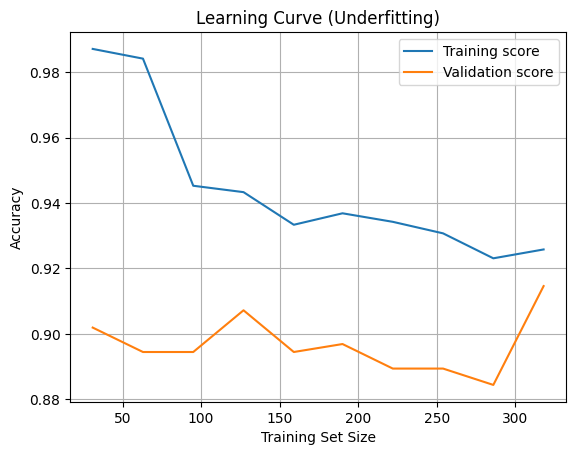

In [16]:
# Learning Curve untuk memeriksa performa pada berbagai ukuran data latih
train_sizes, train_scores, test_scores = learning_curve(model_underfit, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot Learning Curve
plt.figure()
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Validation score')
plt.ylabel('Accuracy')
plt.xlabel('Training Set Size')
plt.title('Learning Curve (Underfitting)')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
# Membandingkan dengan model yang lebih kompleks (e.g., max_depth=5)
model_complex = DecisionTreeClassifier(max_depth=5, random_state=42)
model_complex.fit(X_train, y_train)

y_train_pred_complex = model_complex.predict(X_train)
y_test_pred_complex = model_complex.predict(X_test)

train_acc_complex = accuracy_score(y_train, y_train_pred_complex)
test_acc_complex = accuracy_score(y_test, y_test_pred_complex)

print(f"Complex Model Training Accuracy: {train_acc_complex}")
print(f"Complex Model Test Accuracy: {test_acc_complex}")


Complex Model Training Accuracy: 0.9949748743718593
Complex Model Test Accuracy: 0.9532163742690059


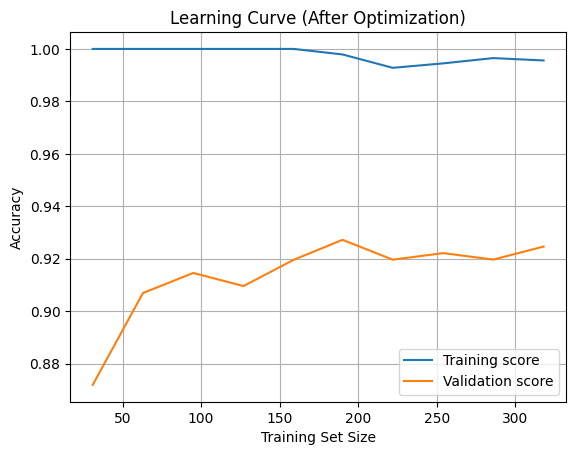

In [18]:
# Learning Curve untuk memeriksa performa pada berbagai ukuran data latih
train_sizes_complex, train_scores_complex, test_scores_complex = learning_curve(model_complex, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean_complex = np.mean(train_scores_complex, axis=1)
test_scores_mean_complex = np.mean(test_scores_complex, axis=1)

# Plot Learning Curve
plt.figure()
plt.plot(train_sizes_complex, train_scores_mean_complex, label='Training score')
plt.plot(train_sizes_complex, test_scores_mean_complex, label='Validation score')
plt.ylabel('Accuracy')
plt.xlabel('Training Set Size')
plt.title('Learning Curve (After Optimization)')
plt.legend()
plt.grid(True)
plt.show()

### PCA (Principal Component Analysis)

PCA adalah teknik untuk mengurangi dimensi data dengan memproyeksikan data ke dalam ruang fitur baru yang tidak berkorelasi. PCA dapat membantu dalam mengurangi overfitting dengan menghilangkan fitur-fitur yang tidak penting.


In [19]:


# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA untuk mengurangi dimensi atau menghasilkan fitur baru
pca = PCA(n_components=5)  # Menghasilkan fitur baru dari data asli
X_pca = pca.fit_transform(X_scaled)

# Membagi data menjadi data latih dan data uji
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Model dengan fitur hasil PCA
complex_model_pca = DecisionTreeClassifier(max_depth=10, random_state=42)
complex_model_pca.fit(X_train_pca, y_train_pca)

# Prediksi pada data latih dan uji
y_train_pred_pca = complex_model_pca.predict(X_train_pca)
y_test_pred_pca = complex_model_pca.predict(X_test_pca)

# Evaluasi performa
train_acc_pca = accuracy_score(y_train_pca, y_train_pred_pca)
test_acc_pca = accuracy_score(y_test_pca, y_test_pred_pca)

print(f"Training Accuracy (PCA): {train_acc_pca}")
print(f"Test Accuracy (PCA): {test_acc_pca}")

Training Accuracy (PCA): 1.0
Test Accuracy (PCA): 0.9415204678362573


###  Hyperparameter Tuning
Hyperparameter tuning adalah proses untuk mencari kombinasi hyperparameter terbaik yang dapat meningkatkan performa model. Dalam kasus ini, kita akan menggunakan Grid Search untuk mencari kombinasi hyperparameter terbaik untuk model Decision Tree. Hyperparameter yang akan dituning adalah:
- `max_depth`: kedalaman maksimum pohon keputusan.
- `min_samples_split`: jumlah minimum sampel yang diperlukan untuk membagi sebuah node.
- `min_samples_leaf`: jumlah minimum sampel yang diperlukan untuk menjadi sebuah leaf node.
- `criterion`: kriteria untuk membagi node (gini atau entropy). (optional)


Menggunakan GridSearchCV untuk mencari kombinasi hyperparameter terbaik. Gunakan cross-validation dengan 5 fold dan scoring menggunakan accuracy.

In [24]:
from sklearn.model_selection import GridSearchCV

# Melakukan normalisasi ulang feature dengan scaler
scaler = StandardScaler()
X_scaled_new = scaler.fit_transform(X)

# Membagi ulang data latih dan uji
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled_new, y, test_size=0.3, random_state=42)

# Grid Search untuk hyperparameter tuning
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid, cv=5, scoring='accuracy')

# Melakukan pencarian hyperparameter terbaik
grid_search.fit(X_train, y_train)

# Hyperparameter terbaik
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_



# Prediksi dengan model terbaik
best_model_after_scaling = best_model.fit(X_train_scaled, y_train_scaled)

y_train_pred_best = best_model_after_scaling.predict(X_train_scaled)
y_test_pred_best = best_model_after_scaling.predict(X_test_scaled)

# Evaluasi performa
train_acc_best = accuracy_score(y_train_scaled, y_train_pred_best)
test_acc_best = accuracy_score(y_test_scaled, y_test_pred_best)

print(f"Best model: {best_model}")
print(f"Training Accuracy (Best Model): {train_acc_best}")
print(f"Test Accuracy (Best Model): {test_acc_best}")
print(f"Best Params: {best_params}")

Best model: DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10,
                       random_state=42)
Training Accuracy (Best Model): 0.9899497487437185
Test Accuracy (Best Model): 0.9590643274853801
Best Params: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}


Training Accuracy (New Model): 0.9824046920821115
Test Accuracy (New Model): 0.9692982456140351


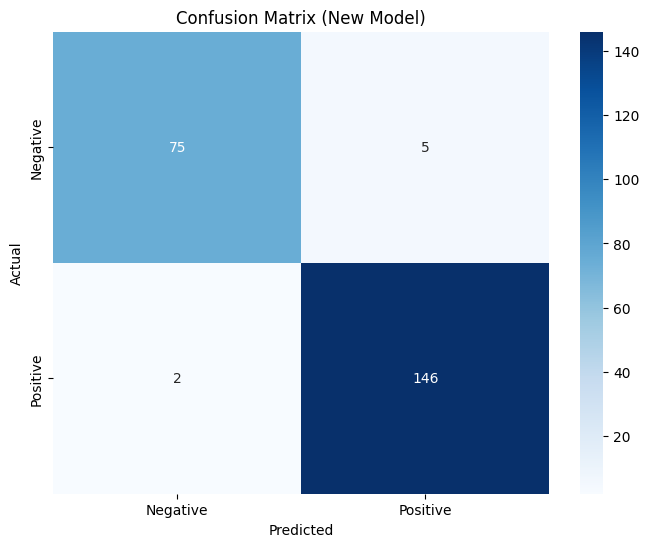

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

X_scaled_new.head()

X_train_v2, X_test_v2, y_train_v2, y_test_v2 = train_test_split(X_scaled_new, y, test_size=0.4, random_state=42)
new_model_v2 = best_model_after_scaling.fit(X_train_v2, y_train_v2) # Melatih model dengan data baru
y_train_pred_v2 = new_model_v2.predict(X_train_v2)
y_test_pred_v2 = new_model_v2.predict(X_test_v2) # Prediksi dengan data baru

# Evaluasi performa
train_acc_v2 = accuracy_score(y_train_v2, y_train_pred_v2)
test_acc_v2 = accuracy_score(y_test_v2, y_test_pred_v2) # Evaluasi performa dengan data baru

print(f"Training Accuracy (New Model): {train_acc_v2}")
print(f"Test Accuracy (New Model): {test_acc_v2}") # Menampilkan hasil evaluasi performa dengan data baru

# Menampilkan confusion matrix
conf_matrix_v2 = confusion_matrix(y_test_v2, y_test_pred_v2)

# Print confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_v2, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (New Model)')
plt.show() # Menampilkan confusion matrix dengan seaborn heatmap

In [42]:
import pickle

with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
 # Menyimpan model terbaik ke dalam file pickle

In [97]:
# Load the saved model
from sklearn.metrics import classification_report


with open('best_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

datasetv2 = load_breast_cancer()

# Show data in dataframe
df = pd.DataFrame(datasetv2.data, columns=datasetv2.feature_names)
# print(df.head())


# print(len(datasetv2.feature_names))

X_new = datasetv2.data
y_new = datasetv2.target

scaler = StandardScaler()
X_new_scaled = scaler.fit_transform(X_new)

# Predict using the loaded model
y_new_pred = loaded_model.predict(X_new_scaled)

# Calculate the accuracy score
accuracy = accuracy_score(y_new, y_new_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print the confusion matrix
conf_matrix = confusion_matrix(y_new, y_new_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Print the classification report
class_report = classification_report(y_new, y_new_pred)
print("Classification Report:")
print(class_report)


Accuracy: 0.98
Confusion Matrix:
[[204   8]
 [  5 352]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       212
           1       0.98      0.99      0.98       357

    accuracy                           0.98       569
   macro avg       0.98      0.97      0.98       569
weighted avg       0.98      0.98      0.98       569



## Testing model with custom data

In [124]:
# Testing model with custom data

# Imitate data from dataset and change parameters to see if model predicts correctly

imitate_last_dataset_have_breast_cancer,imitate_last_dataset_have_breast_cancer_val,imitate_last_dataset_not_have_breast_cancer ,imitate_last_dataset_not_have_breast_cancer_val = None,None,None,None

for i in range(len(y_new)):

    # Find data that have 0 in target
    if y_new[i] == 0:
        imitate_last_dataset_not_have_breast_cancer = X_new[i].copy()
        imitate_last_dataset_not_have_breast_cancer_val = y_new[i]

    # Find data that have 1 in target
    if y_new[i] == 1:
        imitate_last_dataset_have_breast_cancer = X_new[i].copy()
        imitate_last_dataset_have_breast_cancer_val = y_new[i]

    # Break loop after finding both data
    if imitate_last_dataset_have_breast_cancer is not None and imitate_last_dataset_not_have_breast_cancer is not None:
        break


print("=== Data have breast cancer ===")
# Change the first 5 parameters to see if model predicts correctly
print("Original first 25 data:")
print(imitate_last_dataset_have_breast_cancer[0:25])

print("===Data doesn't have breast cancer ===")
print(imitate_last_dataset_not_have_breast_cancer[0:25])

print("\n\nChange data have breast cancer to nearly match doesnt have breast cancer to predict:")
imitate_last_dataset_have_breast_cancer[0:25] = imitate_last_dataset_not_have_breast_cancer[0:25]
print(imitate_last_dataset_have_breast_cancer[0:25])

# Create a custom data point
custom_data = []
# Insert data to custom_data 2d array (array inside array)
custom_data.append(imitate_last_dataset_have_breast_cancer)
# Check array dimension
# print("Array dimension:")
# print("Custom data:", np.array(custom_data).shape)
# print("Original data:", np.array(X_new).shape)

# Scale the custom data point
custom_data_scaled = scaler.transform(custom_data)

# Predict on the custom data point
custom_prediction = loaded_model.predict(custom_data_scaled)
print("Actual:", imitate_last_dataset_have_breast_cancer_val)
print("Prediction (after change the first 25 value to match not have breast cancer):", custom_prediction[0])


=== Data have breast cancer ===
Original first 25 data:
[1.354e+01 1.436e+01 8.746e+01 5.663e+02 9.779e-02 8.129e-02 6.664e-02
 4.781e-02 1.885e-01 5.766e-02 2.699e-01 7.886e-01 2.058e+00 2.356e+01
 8.462e-03 1.460e-02 2.387e-02 1.315e-02 1.980e-02 2.300e-03 1.511e+01
 1.926e+01 9.970e+01 7.112e+02 1.440e-01]
===Data doesn't have breast cancer ===
[1.981e+01 2.215e+01 1.300e+02 1.260e+03 9.831e-02 1.027e-01 1.479e-01
 9.498e-02 1.582e-01 5.395e-02 7.582e-01 1.017e+00 5.865e+00 1.124e+02
 6.494e-03 1.893e-02 3.391e-02 1.521e-02 1.356e-02 1.997e-03 2.732e+01
 3.088e+01 1.868e+02 2.398e+03 1.512e-01]


Change data have breast cancer to nearly match doesnt have breast cancer to predict:
[1.981e+01 2.215e+01 1.300e+02 1.260e+03 9.831e-02 1.027e-01 1.479e-01
 9.498e-02 1.582e-01 5.395e-02 7.582e-01 1.017e+00 5.865e+00 1.124e+02
 6.494e-03 1.893e-02 3.391e-02 1.521e-02 1.356e-02 1.997e-03 2.732e+01
 3.088e+01 1.868e+02 2.398e+03 1.512e-01]
Actual: 1
Prediction (after change the first 25 value